In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
#Load data
df = pd.read_csv('insurance - insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1 Do smokers have higher insurance charges than non-smokers?

Defining Hypothesis

Null Hypothesis "Smokers do not have higher insurance charges than non-smokers."

Alternate Hypothesis: "Smokers have higher insurance charges than non-smokers."

The significance value is 0.05


Determining the test:
1. Data Type - Numeric
2. Number of Groups - 2
3. Appropriate Test - T-Test

In [3]:
#Exploring the Smokers column
df['smoker'].value_counts()

#Shows there are 1064 non smokers and 274 smokers in the data

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
#Separating Smokers from non smokers
df['smokers'] = df['smoker'].str.contains('yes')
df['smokers'].value_counts()

False    1064
True      274
Name: smokers, dtype: int64

In [5]:
#To save a list of smokers and charges as a column
column = ['charges','smokers']
df[column]

,charges,smokers
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [6]:
#Saving smoker group(if they smoke and the charges asscociated with each instance) as a variable
smokers_df = df.loc[df['smokers']==True,column]
smokers_df

,charges,smokers
0,16884.92400,True
11,27808.72510,True
14,39611.75770,True
19,36837.46700,True
23,37701.87680,True
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


In [7]:
#Saving non-smoker group(if they do not smoke and the charges asscociated with each instance) as a variable
non_smokers_df = df.loc[df['smokers']==False,column]
non_smokers_df

,charges,smokers
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [8]:
#Joining the smoker and non-smoker group for plotting 
smokers_plot_df = pd.concat([smokers_df, non_smokers_df])
smokers_plot_df

,charges,smokers
0,16884.9240,True
11,27808.7251,True
14,39611.7577,True
19,36837.4670,True
23,37701.8768,True
...,...,...
1332,11411.6850,False
1333,10600.5483,False
1334,2205.9808,False
1335,1629.8335,False


<AxesSubplot:xlabel='smokers', ylabel='charges'>

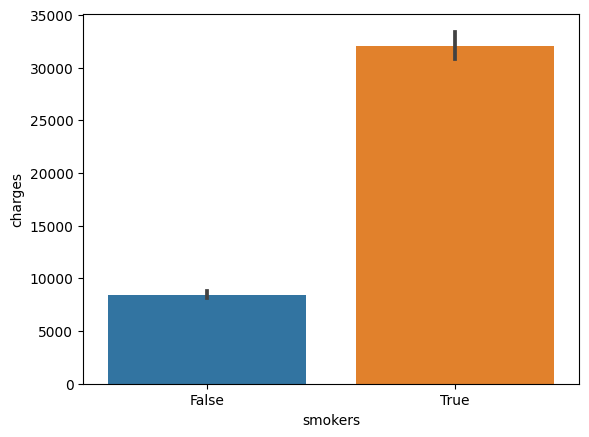

In [9]:
#Visualizing smoking and non smoking groups
sns.barplot(data = smokers_plot_df, x = 'smokers', y = 'charges')

The graph above shows that smokers pay more in insurance charges than non-smokers

In [10]:
#saving numeric values as final group variables
smokers_group =  smokers_df['charges']
non_smokers_group = non_smokers_df['charges']
smokers_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [11]:
# checking for outliers in smokers group
smokers_group_outliers = np.abs(stats.zscore(smokers_group))>3
smokers_group_outliers.value_counts()

False    274
Name: charges, dtype: int64

There are no outliers in the smokers group

In [12]:
# checking for outliers in non smokers group
non_smokers_group_outliers = np.abs(stats.zscore(non_smokers_group))>3
non_smokers_group_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

There are 24 outliers that need to be removed

In [13]:
#Removing Outliers from the non smokers group
non_smokers_group= non_smokers_group[~non_smokers_group_outliers]

## Checking for Normality

In [14]:
results = stats.normaltest(smokers_group)
results

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [15]:
results = stats.normaltest(non_smokers_group)
results

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

## Checking for Equal variance

In [16]:
#Checking for Equal variance using the Levene Test
result = stats.levene(smokers_group, non_smokers_group)
print(result)
print(result.pvalue<0.5)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


## Running Statistical Test since the equal variance assumption was not met

In [17]:
#Using the independent t-test to test the assumption since the equal variance assumption was not met
result = stats.ttest_ind(smokers_group, non_smokers_group, equal_var=False)
print(result)
print(result.pvalue<0.05)

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)
True


## Final Conclusion

Based on the statistical test results, where p-value <0.05, we can conclude that smokers insurance charges are higher than non-smokers, hence we can reject the null hypothesis.

# Q2. Are men more likely to smoke than women?

Null Hypothesis: Men are not more likely to smoke then women

Alternative Hypothesis Men are more likely to smoke than women

Determining test

1. data type - categorical

2. number of groups - 2

3. What test is appropriate - Chi-Square

The alpha is set to 0.05

In [18]:
# checking gender info
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
#seperating male and female groups
df['female'] = df['sex'].str.contains('female')
df['female'].value_counts()

False    676
True     662
Name: female, dtype: int64

In [20]:
#saving the male and female group as a list of columns
column = ['female','smoker']
df[column]

,female,smoker
0,True,yes
1,False,no
2,False,no
3,False,no
4,False,no
...,...,...
1333,False,no
1334,True,no
1335,True,no
1336,True,no


In [21]:
#saving female group as a column
female_df = df.loc[df['female']==True, column]
female_df

,female,smoker
0,True,yes
5,True,no
6,True,no
7,True,no
9,True,no
...,...,...
1332,True,no
1334,True,no
1335,True,no
1336,True,no


In [22]:
# save male group as a column
male_df = df.loc[df['female']==False, column]
male_df

,female,smoker
1,False,no
2,False,no
3,False,no
4,False,no
8,False,no
...,...,...
1324,False,no
1325,False,no
1327,False,no
1329,False,no


In [23]:
#Joining the male and female group for plotting 
sex_plot_df = pd.concat([female_df, male_df])
sex_plot_df

,female,smoker
0,True,yes
5,True,no
6,True,no
7,True,no
9,True,no
...,...,...
1324,False,no
1325,False,no
1327,False,no
1329,False,no


<AxesSubplot:xlabel='smoker', ylabel='female'>

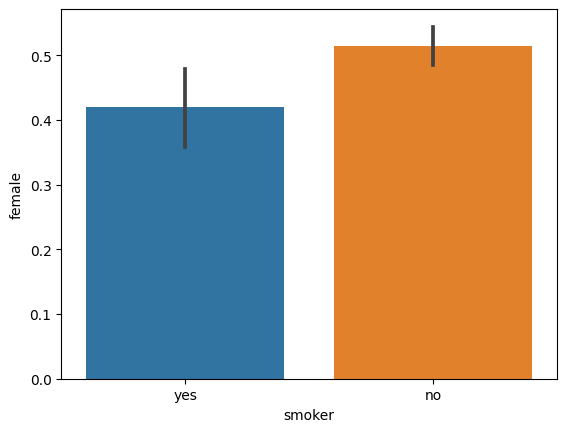

In [24]:
#Visualizing smoking and non smoking groups
sns.barplot(data = sex_plot_df, x = 'smoker', y = 'female')

About 40% of smokers in this group are female.

In [25]:
# saving categorical values as final group variables
female_group =  female_df['smoker']
male_group = male_df['smoker']
male_group

1       no
2       no
3       no
4       no
8       no
        ..
1324    no
1325    no
1327    no
1329    no
1333    no
Name: smoker, Length: 676, dtype: object

In [26]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


There are about 44 more male smokers than female smokers in this table

## Calculating Chi-Square Test

In [27]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

## Final Conclusion

our p value is less than 0.05, we can reject the null hypothesis and infer that men are more likely to smoke than women.

# Q3. Do different regions have different charges, on average?

Null Hypothesis: There are is NOT a significant diffence in charges based off region

Alternative Hypothesis: There IS a significant differenc in charges based off region

Determining test

1. data type - numerical
2. number of groups - 4
3. What test is appropriate - ANOVA and/or Tukey
4. The alpha is set to .05

In [28]:
# Checking the region column
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [29]:
#seperating groups in the region column
df['se_region'] = df['region'].str.contains('southeast')
df['sw_region'] = df['region'].str.contains('southwest')
df['nw_region'] = df['region'].str.contains('northwest')
df['ne_region'] = df['region'].str.contains('northeast')
df['ne_region'].value_counts()

False    1014
True      324
Name: ne_region, dtype: int64

In [30]:
#saving the region and charges as columns
column = ['region','charges']
df[column]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [31]:
#save groups as a variable
se_df = df.loc[df['se_region']==True, column]
sw_df = df.loc[df['sw_region']==True, column]
ne_df = df.loc[df['ne_region']==True, column]
nw_df = df.loc[df['nw_region']==True, column]
ne_df

,region,charges
8,northeast,6406.41070
10,northeast,2721.32080
16,northeast,10797.33620
17,northeast,2395.17155
20,northeast,13228.84695
...,...,...
1321,northeast,28101.33305
1325,northeast,13143.33665
1326,northeast,7050.02130
1328,northeast,22395.74424


In [32]:
#Joining the regions for plotting 
regions_plot_df = pd.concat([se_df,sw_df,ne_df,nw_df])
regions_plot_df

,region,charges
1,southeast,1725.55230
2,southeast,4449.46200
5,southeast,3756.62160
6,southeast,8240.58960
11,southeast,27808.72510
...,...,...
1319,northwest,7201.70085
1320,northwest,5425.02335
1324,northwest,4239.89265
1333,northwest,10600.54830


<AxesSubplot:xlabel='region', ylabel='charges'>

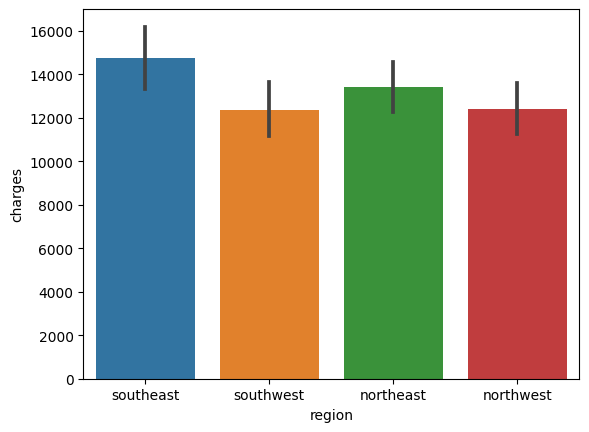

In [33]:
#Visualizing regions and charges
sns.barplot(data = regions_plot_df, x = 'region', y= 'charges')

The southeast and northeast seems to pay more than the northwest and southwest

In [34]:
## Create groups dictionary. There are 4 groups
groups = {}
## Loop through all unique categories
for r in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==r,'charges'].copy()
    
    # save into the dictionary
    groups[r] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Normality Test

In [35]:
## Running normal test on each group and confirming there are >20 in each group
normal_results = {}
for r, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    normal_results[r] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
normal_results_df = pd.DataFrame(normal_results).T
normal_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [36]:
# perform  hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

P-value is less than 0.05 so there is a significant difference between the region. We can use the turkeys test to determine which regions are different

In [37]:
# determining which groups were different
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Turkeys test shows there is a significant difference between the southeast and southwest

## Final Conclusion

We can reject the null hypothesis that there is no difference between region and insurance charges. The southeast and southwest had the most significant differences.